#**Install Required Libraries**


In [12]:
!pip install yfinance pandas numpy scikit-learn matplotlib seaborn


#**Import Libraries**

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#**Fetch Data**
Fetch historical stock data using yfinance.

In [14]:
# Define the ticker symbol
ticker = "AAPL"

# Get the data
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")

# Display the first few rows
data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


#**Data Cleaning**
Ensure there are no missing values and handle any anomalies.

In [15]:
# Check for missing values
data.isnull().sum()

# Drop rows with missing values (if any)
data.dropna(inplace=True)

# Reset the index to ensure proper time series indexing
data.reset_index(inplace=True)


#**Data Visualization**
Visualize the stock prices.

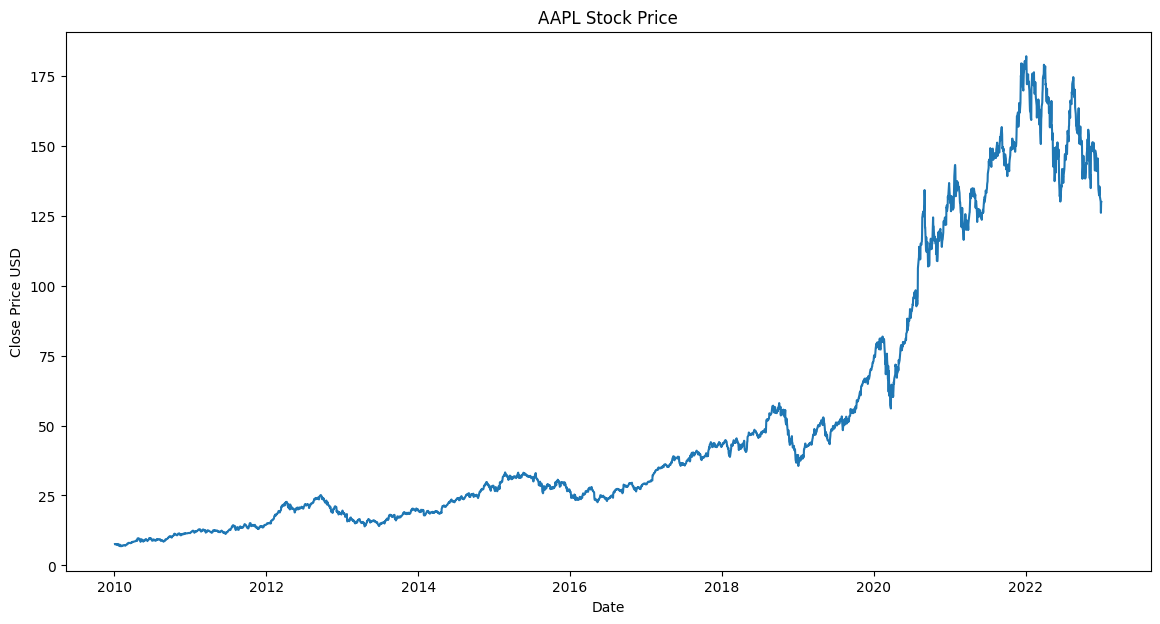

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'])
plt.title(f"{ticker} Stock Price")
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.show()


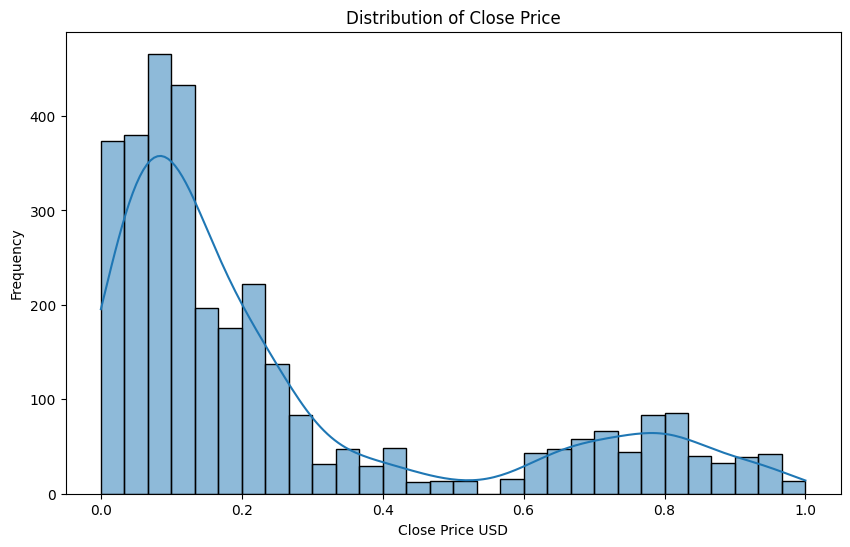

In [23]:
# Distribution of Close Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price USD')
plt.ylabel('Frequency')
plt.show()


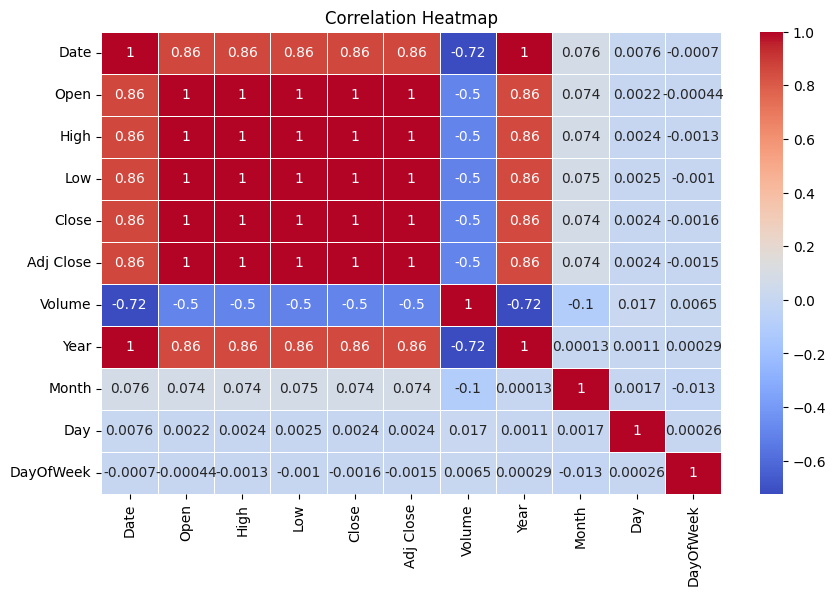

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

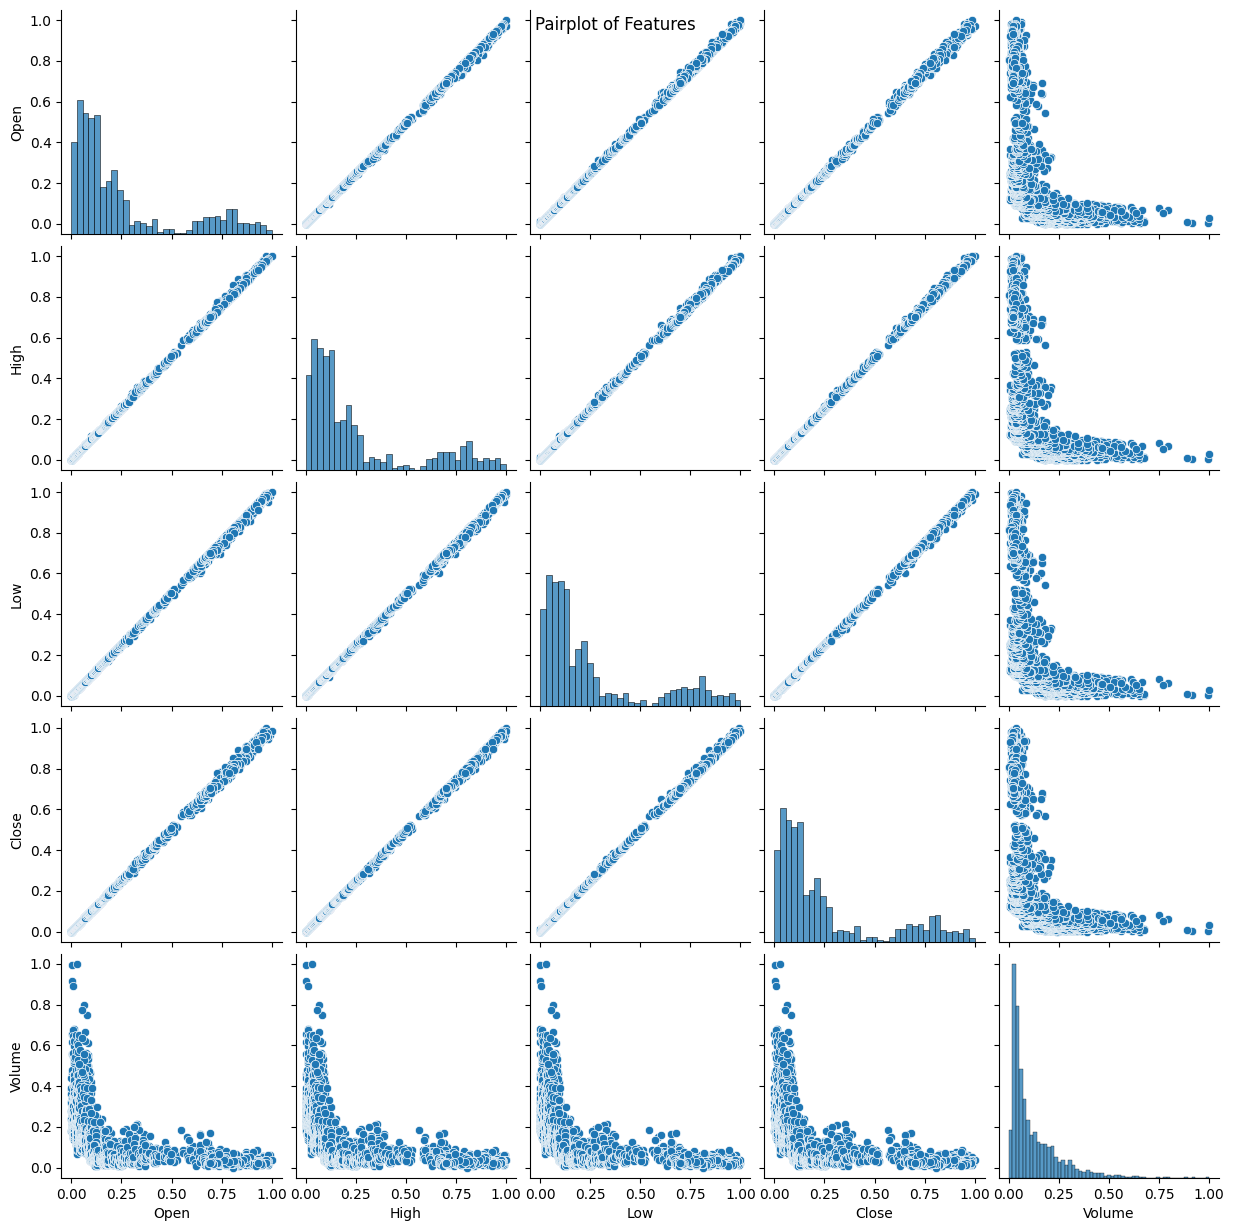

In [25]:
# Pairplot
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pairplot of Features')
plt.show()

#**Feature Engineering**
Create new features for the model.

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek


#**Normalization**
Normalize the features using Min-Max scaling.

In [18]:
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])


#**Prepare Training and Testing Data**
Split the data into training and testing sets.

In [19]:
# Features and target
X = data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek']]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**Model Training**
Train a linear regression model.

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#**Model Evaluation**
Evaluate the model's performance.

In [21]:
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 0.0014206940223234514
Mean Squared Error: 8.25874801378592e-06
R-squared: 0.9998918602764248


#**Visualization of Predictions**
Compare the predicted and actual stock prices.

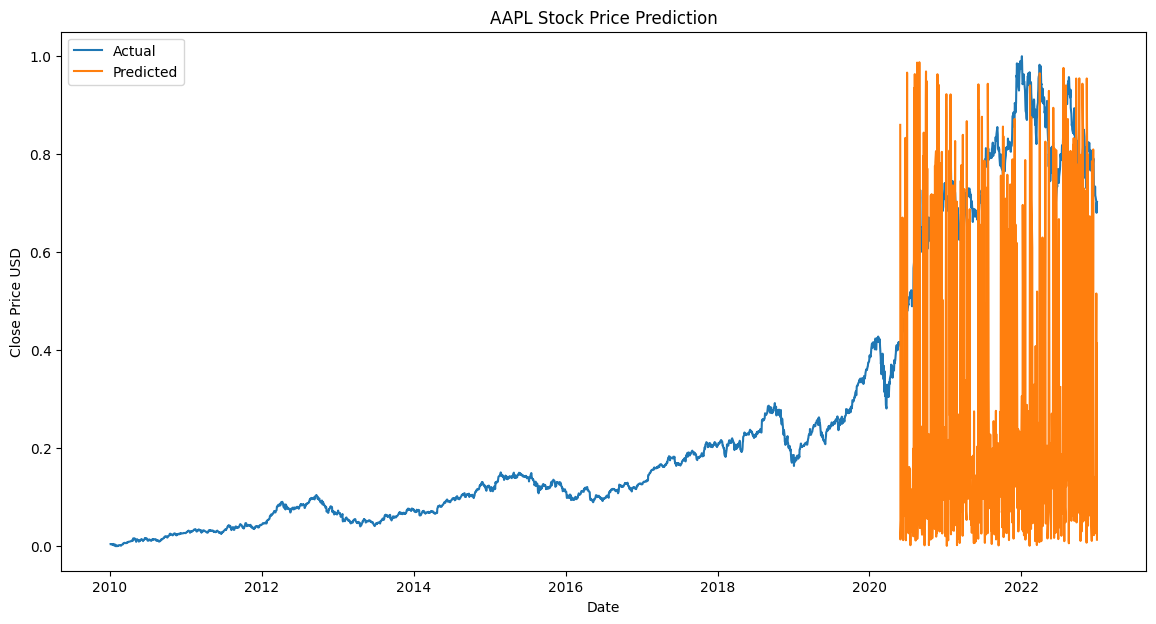

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Actual')
plt.plot(data['Date'].iloc[len(y_train):], y_pred, label='Predicted')
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.legend()
plt.show()
